# Лабораторная работа №7

## Постановка задачи

1. Реазизовать Rejection sampling

2. Реазиовать метод Метрополиса-Гастингса

3. Протестировать работу методов на двух функциях плотности распределения

## Источники

* [Метод Парзена-Розенблата](https://yandex.ru/q/machine-learning/12341383425/)


# Подключение зависимостей

In [6]:
import math
import copy
import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
from PIL import Image

## Экспоненциальное распределение

$F_X(x) = \left\{\begin{matrix}
1-e^{-\lambda x}&,\; x \ge 0, \\
0 &,\; x < 0.
\end{matrix}\right.$

$f_X(x) = \begin{cases}
\lambda \,e^{-\lambda x} ,& x \ge 0, \\
0 ,& x < 0.
\end{cases}$

In [16]:
class ExponentialDistribution():
  
  @staticmethod
  def generate_value(lmd: float = 0.1) -> float:
    return math.log(1 / (1 - random.uniform(0, 1))) / lmd

  @staticmethod
  def generate_list(lmd: float = 0.1, count: int = 100) -> list:
    return [ExponentialDistribution.generate_value(lmd) for i in range(count)]
  
  @staticmethod
  def probability_density(x: float, lmd: float = 0.5):
    return lmd * np.exp(-lmd * x)


## Распределение Вигнера

$\rho (x)={\frac {2}{\pi R^{2}}}{\sqrt {R^{2}-x^{2}}}$

In [27]:
class WignerDistribution():

  @staticmethod
  def probability_density(x: float, r: float = 1.):
    return (2 * np.sqrt(r**2 - x**2)) / (np.pi * r**2)

# Rejection Sampling

In [102]:
def rejection_sampling(func, bounds: np.ndarray, count: int):
    
    """Определяет, какие точки находящиеся под и над графиком

    Args:
        func (_type_): функция
        bounds (np.ndarray): границы
        count (int): кол-во

    Returns:
        _type_: кортеж точек лежащих под и над графиком
    """

    inside_points = []
    outside_points = []

    while len(inside_points) < count:
        
        x = np.random.rand() * (bounds[1, 0] - bounds[0, 0]) + bounds[0, 0]
        y = np.random.rand() * (bounds[1, 1] - bounds[0, 1]) + bounds[0, 1]
        
        if y < func(x): 
            inside_points.append(np.array([x, y]))
        else: 
            outside_points.append(np.array([x, y]))

    return inside_points, outside_points

In [138]:
def draw_rejection_sampling(distribution, bounds: np.ndarray, points_count: int = 1000):

    """Вывод результатов работы алгоритма Rejection sampling

    Args:
        distribution (_type_): Распределение
        bounds (np.ndarray): Границы
        points_count (int, optional): Кол-во точек. Defaults to 1000.
    """

    x = np.linspace(bounds[0, 0], bounds[1, 0], points_count)
    y = distribution.probability_density(x)

    inside, outside = rejection_sampling(distribution.probability_density, bounds, 1000)
    inside = np.array(inside)
    outside = np.array(outside)

    fig, ax = plt.subplots(figsize=(10,5))
    ax.hist(inside[:, 0], 20, density=True, alpha = 0.75)
    ax.scatter(inside[:,0], inside[:,1], s=4)
    ax.scatter(outside[:,0], outside[:,1], s=4)
    ax.plot(x, y, lw=3)

    ax.set_xlim(bounds[0, 0], bounds[1, 0])
    ax.set_title(f'Rejection Sampling для {distribution.__name__}')

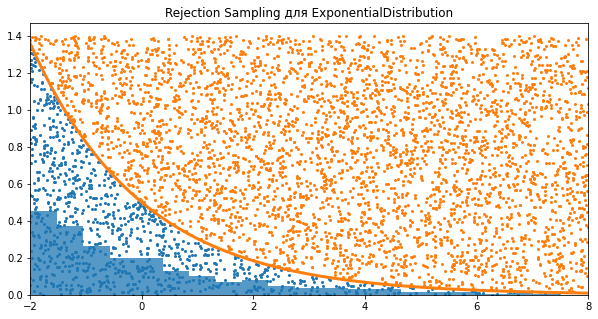

In [139]:
draw_rejection_sampling(ExponentialDistribution, np.array([[-2.,0],[8.,1.4]]))

C:\Users\Ansave\AppData\Local\Temp\ipykernel_17836\1140424447.py:5: RuntimeWarning: invalid value encountered in sqrt
  return (2 * np.sqrt(r**2 - x**2)) / (np.pi * r**2)


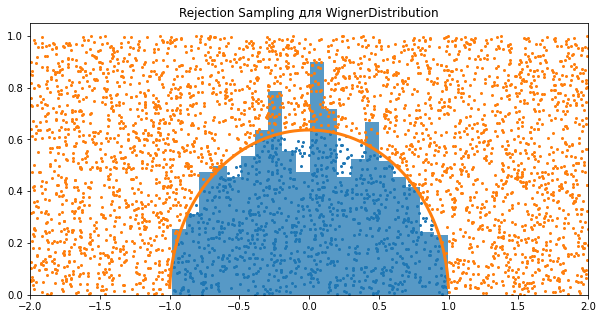

In [140]:
draw_rejection_sampling(WignerDistribution, np.array([[-2.,0],[2.,1.]]))

# Метод Метрополиса-Гастинга

In [197]:
def Metropolis_Hastings(func, start: np.ndarray, count: int):

    x=[start]

    while len(x) < count:
        
        x_prev = x[-1]
        x_next = np.random.normal(x_prev)
        
        ratio = func(x_next) / func(x_prev)

        if np.random.rand() < ratio:
            x.append(x_next)
        else:
            x.append(x_prev)

    return x

In [247]:
def draw_Metropolis_Hastings(distribution, x_bounds: np.ndarray, start: float = 1, points_count: int = 1000, hist_density: bool = True):
    
    x = np.linspace(x_bounds[0], x_bounds[1], points_count)
    y = distribution.probability_density(x)

    MH_x = Metropolis_Hastings(distribution.probability_density, start, points_count)

    fig, ax = plt.subplots(figsize=(10,5))
    ax.hist(MH_x, 40, density=hist_density, alpha = 0.75)
    ax.plot(x, y, lw=4)

    ax.set_xlim(x_bounds[0], x_bounds[1])
    ax.set_title(f'Metropolis-Hastings для {distribution.__name__}')


C:\Users\Ansave\AppData\Local\Temp\ipykernel_17836\1140424447.py:5: RuntimeWarning: invalid value encountered in sqrt
  return (2 * np.sqrt(r**2 - x**2)) / (np.pi * r**2)
C:\Users\Ansave\AppData\Local\Temp\ipykernel_17836\3919006404.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = func(x_next) / func(x_prev)


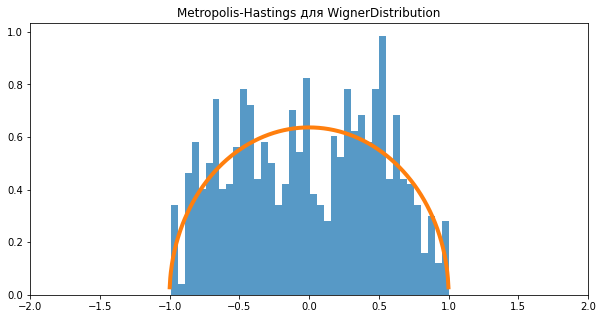

In [249]:
draw_Metropolis_Hastings(WignerDistribution, np.array([-2, 2]), start=1, hist_density=True)

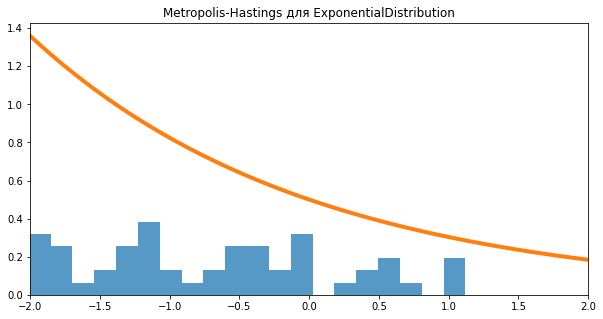

In [299]:
draw_Metropolis_Hastings(ExponentialDistribution, np.array([-2, 2]), start=1, points_count=100, hist_density=True)